# Author: Mohammed Megahed Algamal
# Task one: Prediction using Supervised ML



### First: Importing all libraries

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error

### Second: Reading Data

In [8]:
data = pd.read_csv("http://bit.ly/w-data")
print("Successful reading of data")
data.head(10)

Successful reading of data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Third: getting more info about the data set

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


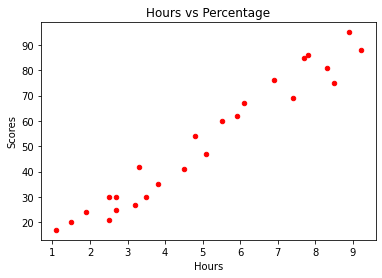

In [13]:
data.plot(kind='scatter', x='Hours', y='Scores', color='red')
plt.title('Hours vs Percentage')  
plt.show()

#### From the plot above we can conclude a positive linear relation between the 2 variables (percentage of score and hours of study), so i will use linear regression

### Fourth: Preparing the data and splitting it into training and testing

In [15]:
x = data.iloc[:, :-1].values 
y = data.iloc[:, 1].values 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 


In [16]:
x_train.shape

(20, 1)

In [20]:
y_test.shape

(5,)

### Fifth: Training the model

In [28]:
reg = LinearRegression()  
reg.fit(x_train, y_train)

print('successful training')

successful training


### Sixth: Plotting line of regression 

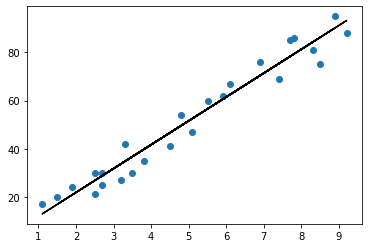

In [29]:
line = reg.coef_*x+reg.intercept_

plt.scatter(x, y)
plt.plot(x, line,color='black');
plt.show()

### Seventh: Making predictions using the model (and answering the question)

In [31]:
y_predict = reg.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [32]:
print("Train Score:",reg.score(x_train,y_train))
print("Test Score:",reg.score(x_test,y_test))

Train Score: 0.9515510725211552
Test Score: 0.9454906892105356


## Answering the Question using my own model 

In [37]:
s_hours = np.array(9.25).reshape(-1, 1)
ans = reg.predict(s_hours)
print("Number of  Hours = {}".format(s_hours[0, 0]))
print("Predicted Score = {}".format(ans[0]))

Number of  Hours = 9.25
Predicted Score = 93.69173248737538


### Eighth: Evaluating the model

In [39]:
print("Mean Absolure Error: ", mean_absolute_error(y_predict, y_test))

Mean Absolure Error:  4.183859899002975
